In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm as lgb

In [27]:
data = pd.read_csv("./data/test_data.csv")

In [28]:
data.head()

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction,deltaTime
0,1343050,M,03/02/21 15:15,03/02/21 15:15,03/02/21 15:38,03/02/21 15:52,14480,10.109,41.70,108.0,106.0,4,Normal,other,357.0,2.0,0,0.025694
1,1343051,F,03/02/21 15:15,03/02/21 15:15,03/02/21 15:26,03/02/21 15:46,14594,6.547,74.10,46.0,46.0,2,Prime,other,253.0,0.0,0,0.021528
2,1343052,F,03/02/21 15:15,03/02/21 15:15,03/02/21 15:34,03/02/21 15:46,5486,17.193,23.55,94.0,90.0,2,Prime,other,2229.0,4.0,0,0.021528
3,1343053,F,03/02/21 15:15,03/02/21 15:15,03/02/21 15:34,03/02/21 15:42,11578,26.838,17.55,24.0,24.0,3,Prime,low,161.0,0.0,0,0.018750
4,1343054,F,03/02/21 15:15,03/02/21 15:15,03/02/21 15:30,03/02/21 15:43,2322,13.001,42.90,24.0,24.0,1,Normal,low,65.0,0.0,0,0.019444


In [29]:
data.describe()

,order_id,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,lifetime_order_count,undelivered_orders,dissatisfaction,deltaTime
count,1.104000e+05,110400.000000,110400.000000,110400.000000,106428.000000,106340.000000,110400.000000,110387.000000,106340.000000,110400.000000,110400.000000
mean,1.398250e+06,6623.333578,12.408124,43.638757,104.962482,104.300442,3.009420,822.152917,0.747818,0.010987,-485.969494
std,3.186988e+04,4637.810985,8.440821,27.032247,91.219761,90.724404,1.414131,1479.699362,1.053994,0.104243,4610.899281
min,1.343050e+06,0.000000,0.002123,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-44233.417360
25%,1.370650e+06,2376.000000,5.486750,21.900000,35.000000,35.000000,2.000000,141.000000,0.000000,0.000000,0.015278
50%,1.398250e+06,5878.000000,11.521500,39.750000,81.000000,81.000000,3.000000,365.000000,0.000000,0.000000,0.020139
75%,1.425849e+06,10671.000000,18.716250,62.250000,149.000000,148.000000,4.000000,913.000000,1.000000,0.000000,0.025694
max,1.453449e+06,16621.000000,116.741000,248.550000,567.000000,562.000000,5.000000,30469.000000,9.000000,1.000000,3.596528


In [30]:
#Checking missing values
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [31]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values

Your selected dataframe has 18 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
delivered_orders,4060,3.7
undelivered_orders,4060,3.7
alloted_orders,3972,3.6
delivered_time,1213,1.1
pickup_time,536,0.5
lifetime_order_count,13,0.0


In [32]:
#lets do Lable enconding coding to make more features 

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 3:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            print(col)
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

gender
membership
product_importan
3 columns were label encoded.


<AxesSubplot:>

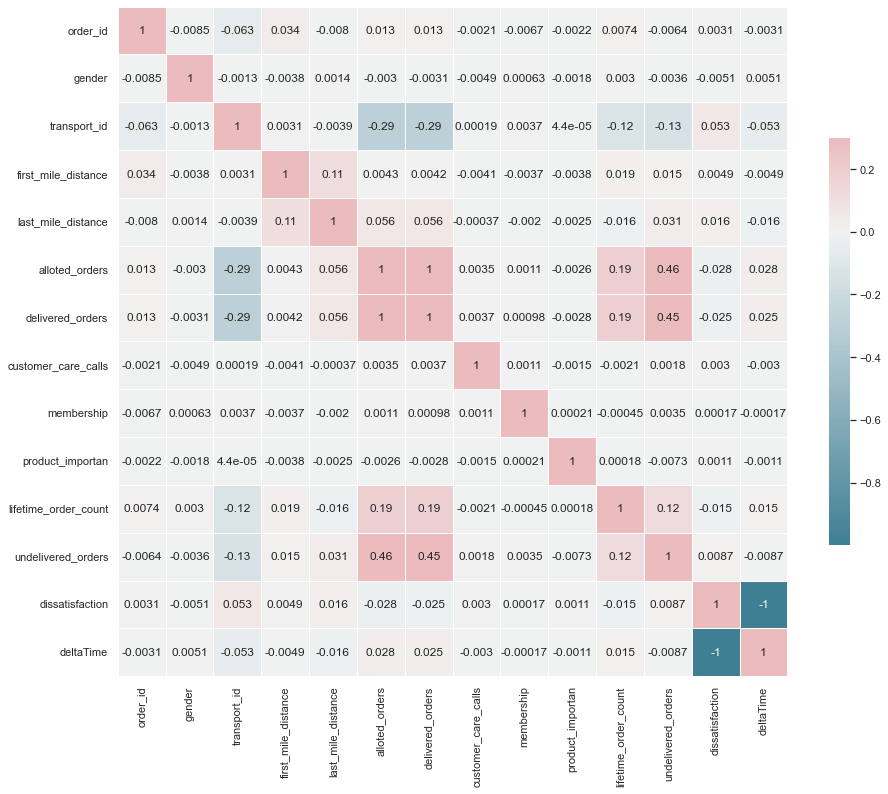

In [33]:
#data = pd.get_dummies(data)
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
for col in data:
    print(col, data[col].dtype)

order_id int64
gender int64
order_time object
allot_time object
pickup_time object
delivered_time object
transport_id int64
first_mile_distance float64
last_mile_distance float64
alloted_orders float64
delivered_orders float64
customer_care_calls int64
membership int64
product_importan int64
lifetime_order_count float64
undelivered_orders float64
dissatisfaction int64
deltaTime float64


In [35]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
3,delivered_time,2310
2,pickup_time,2249
1,allot_time,2183
0,order_time,2131


In [36]:
data.drop(['delivered_time','pickup_time','allot_time','order_time'],axis=1, inplace=True)

<AxesSubplot:xlabel='membership', ylabel='count'>

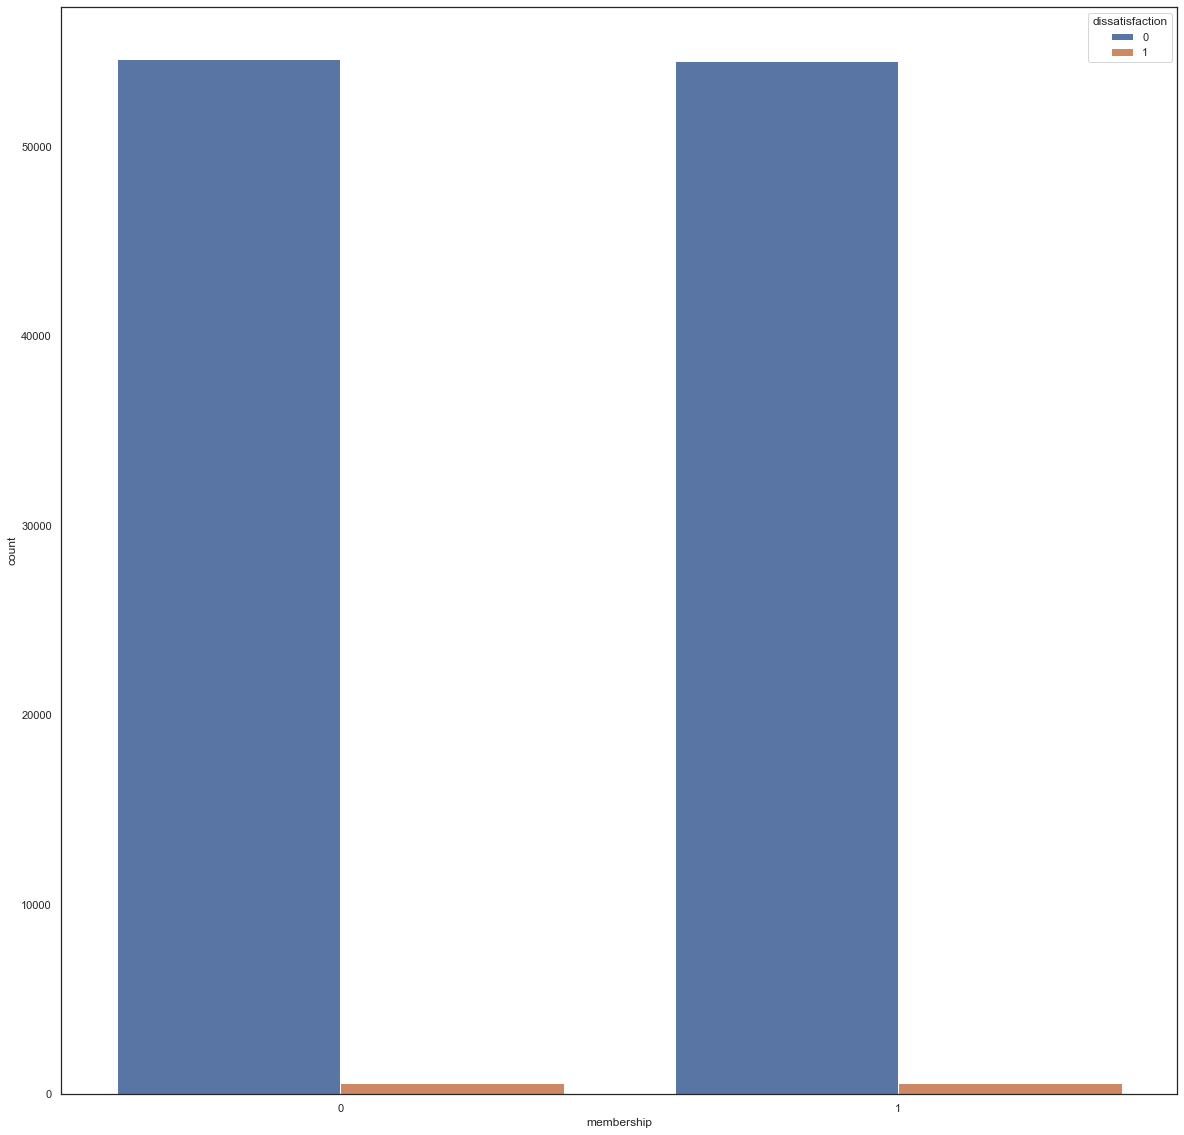

In [37]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='membership',hue='dissatisfaction',data=data)


In [38]:
missing_values = missing_values_table(data)
missing_values

Your selected dataframe has 14 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
delivered_orders,4060,3.7
undelivered_orders,4060,3.7
alloted_orders,3972,3.6
lifetime_order_count,13,0.0


In [39]:
#f, ax = plt.subplots(figsize=(20, 20))
corr= data.corr()
y=data['dissatisfaction']
X= data.drop('dissatisfaction',axis=1)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [50]:
def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":100,
       "reg_alpha" : 0.5,
       "reg_lambda":0.5,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":30,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 10,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 60,
       "max_bin":60,
       'max_depth':3,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':1.4,
        'bagging_fraction':0.8
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=100, 
                      evals_result=evals_result,feval=lgb_f1_score)
    
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [51]:
pred_test, model, evals_result = run_lgb(X_train, X_test, y_train, y_test, X_test)
print("LightGBM Training Completed...")


/Users/jeevakumar/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/jeevakumar/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeevakumar/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeevakum

[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8715623 will be ignored. Current value: bagging_fraction=0.8
Training until validation scores don't improve for 100 rounds
[100]	training's f1: 1	valid_1's f1: 1
Did not meet early stopping. Best iteration is:
[93]	training's f1: 1	valid_1's f1: 1
LightGBM Training Completed...


In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_test,pred_test)

1.0

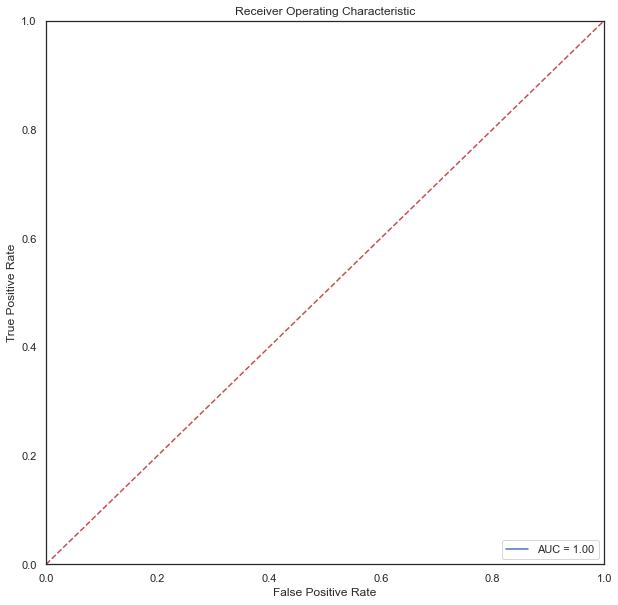

In [47]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_test)
roc_auc = metrics.auc(fpr, tpr)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Plot feature importances...


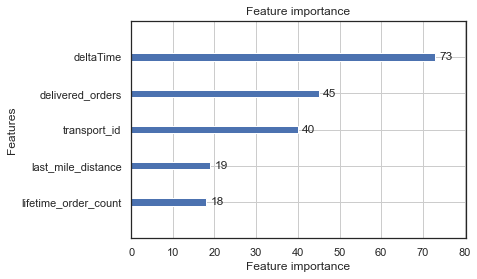

In [49]:
print('Plot feature importances...')
ax = lgb.plot_importance(model, max_num_features=5)
plt.show()